# <center>IEE 520: Fall 2019</center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# <center>Naive Bayes 
</center>

In [ ]:
# For compatibility with Python 2
from __future__ import print_function

# To load datasets
from sklearn import datasets

# To import the classifier (Naive Bayes)
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# To split data to train and test
from sklearn.model_selection import train_test_split

# To measure accuracy
from sklearn import metrics

# To support plots
import matplotlib.pyplot as plt

# To display all the plots inline
%matplotlib inline

# Import Numpy library
import numpy as np

# To import for Cross-Validation Set
from sklearn import model_selection

In [ ]:
# To increase quality of figures
plt.rcParams["figure.figsize"] = (20, 10)

## <center>Load the data</center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


#import data
import pandas as pd
path = "/content/drive/Shared drives/IEE520/Avila-Data-Edited_Final.csv"
data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#print(data.shape)
data.describe()

,Intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,2.086700e+04,20867.000000,20867.000000,20867.000000,2.086700e+04,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,-3.306656e-09,0.018498,0.002329,0.000115,5.697992e-08,0.002540,0.003977,0.000028,0.002108,0.000069
std,1.000007e+00,2.853117,1.058203,0.999997,9.999948e-01,1.065179,1.153325,1.000003,1.045362,1.000010
min,-3.498799e+00,-2.426761,-3.210528,-5.440122,-4.922215e+00,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-1.289290e-01,-0.259834,0.064919,-0.527256,1.723400e-01,-0.598658,-0.044076,-0.543914,-0.372457,-0.515235
50%,5.622900e-02,-0.055704,0.217845,0.089437,2.617180e-01,-0.058835,0.220177,0.108279,0.064084,-0.025918
75%,2.043550e-01,0.203385,0.352988,0.643738,2.617180e-01,0.564038,0.446679,0.648813,0.500624,0.528425
max,1.181992e+01,386.000000,50.000000,3.987152,1.066121e+00,53.000000,83.000000,13.173081,44.000000,11.911338


Variable DESCR contains a nice description of the database

Features:

Targets:

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_transform = data.apply(le.fit_transform)


# Need to convert as yhat returned by the code is numpy
# Otherwise, we input one Dataframe and one numpy array to the confusion matrix
# and this will cause calculation error

data_transform = data_transform.to_numpy() 

In [ ]:
X = data_transform[:, 0:-1]
y = data_transform[:, -1]

# Count of each target values in the dataset
tgt_values, unique_counts = np.unique(y,return_counts=True)
#print(list(zip(tgt_values, unique_counts)))

Compute frequency count of each class

In [ ]:
#pd.Series(y.tolist()).value_counts()
pd.Series(data.iloc[:, -1]).value_counts().sort_index()

A    8572
B      10
C     206
D     705
E    2190
F    3923
G     893
H    1039
I    1663
W      89
X    1044
Y     533
Name: Class: A, B, C, D, E, F, G, H, I, W, X, Y, dtype: int64

**From the line above, we can know that the target values are highly imbalance. Class 1 has only 10 observations.**

## <center>Splilt to train and test<center>
 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## <center>Train the model and predict</center>

In [ ]:
#model = MLPClassifier()
model = GaussianNB()
model.fit(X_train, y_train)
yhat_train = model.predict(X_train) #model.predict always returns numpy array
yhat_test = model.predict(X_test)

## <center>Model evaluation</center>

Accuracy:

In [ ]:
print(metrics.accuracy_score(y_train, yhat_train))
print(metrics.mean_squared_error(y_train, yhat_train))

0.5428622776013898
11.493620080273168


Classification report:

In [ ]:
print(metrics.accuracy_score(y_test, yhat_test))
print(metrics.mean_squared_error(y_test, yhat_test))

0.5313847628174413
11.729036895064686


The result is not too bad: a random guess is 1/

In [ ]:
print(metrics.classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.65      0.53      0.59      6822
           1       1.00      1.00      1.00         7
           2       0.05      0.15      0.08       168
           3       0.49      0.18      0.26       593
           4       0.58      0.33      0.42      1740
           5       0.41      0.47      0.44      3121
           6       0.31      0.67      0.43       728
           7       0.40      0.66      0.50       824
           8       0.91      0.89      0.90      1335
           9       0.12      0.32      0.17        66
          10       0.58      0.71      0.64       859
          11       0.60      0.52      0.55       430

   micro avg       0.53      0.53      0.53     16693
   macro avg       0.51      0.54      0.50     16693
weighted avg       0.57      0.53      0.54     16693



In [ ]:
#!pip install pandas_ml

## <center>Confusion matrix</center>

In [ ]:
# You need to install pandas_ml in order to use that!
 !pip install pandas_ml

# Uncomment the next line to install a missing package to Google Colab Environment

from pandas_ml import ConfusionMatrix

     |████████████████████████████████| 81kB 6.6MB/s 
  Created wheel for pandas-ml: filename=pandas_ml-0.6.1-cp27-none-any.whl size=99434 sha256=a44a0e076b934d232a486f287c05d05c508ff9e6f24336a906a2a6c19b4f744e
  Stored in directory: /root/.cache/pip/wheels/a4/a7/e0/6032cf33b7b780cdfc317752df74d6c0b2ed5a7031ab13f5e9
Successfully built pandas-ml


Confusion matrix:

In [ ]:
cm = ConfusionMatrix(y_train, yhat_train)
print(cm)

Predicted     0  1    2    3    4     5  ...     7     8    9    10   11  __all__
Actual                                   ...                                     
0          3631  0  220   26   65  1693  ...   298    84  116   102   36     6822
1             0  7    0    0    0     0  ...     0     0    0     0    0        7
2            28  0   26   10   41    52  ...     3     2    0     6    0      168
3           144  0   15  105  168    81  ...    56     1    0    17    6      593
4           387  0   78   60  572   170  ...   193     0   12   196   22     1740
5           882  0   66    9   38  1472  ...   201    28    1     2   10     3121
6           145  0    0    0   14    30  ...    32     0    0    14    2      728
7           124  0   22    0    6    59  ...   541     6    0     1    2      824
8            84  0   37    0    1     1  ...     0  1193    2     0   17     1335
9            27  0    6    0    4     0  ...     0     0   21     8    0       66
10           42 

Stats:

/usr/local/lib/python2.7/dist-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/usr/local/lib/python2.7/dist-packages/pandas_ml/confusion_matrix/bcm.py:330: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


Confusion Matrix:

Predicted     0  1    2    3    4     5  ...     7     8    9    10   11  __all__
Actual                                   ...                                     
0          3631  0  220   26   65  1693  ...   298    84  116   102   36     6822
1             0  7    0    0    0     0  ...     0     0    0     0    0        7
2            28  0   26   10   41    52  ...     3     2    0     6    0      168
3           144  0   15  105  168    81  ...    56     1    0    17    6      593
4           387  0   78   60  572   170  ...   193     0   12   196   22     1740
5           882  0   66    9   38  1472  ...   201    28    1     2   10     3121
6           145  0    0    0   14    30  ...    32     0    0    14    2      728
7           124  0   22    0    6    59  ...   541     6    0     1    2      824
8            84  0   37    0    1     1  ...     0  1193    2     0   17     1335
9            27  0    6    0    4     0  ...     0     0   21     8    0       

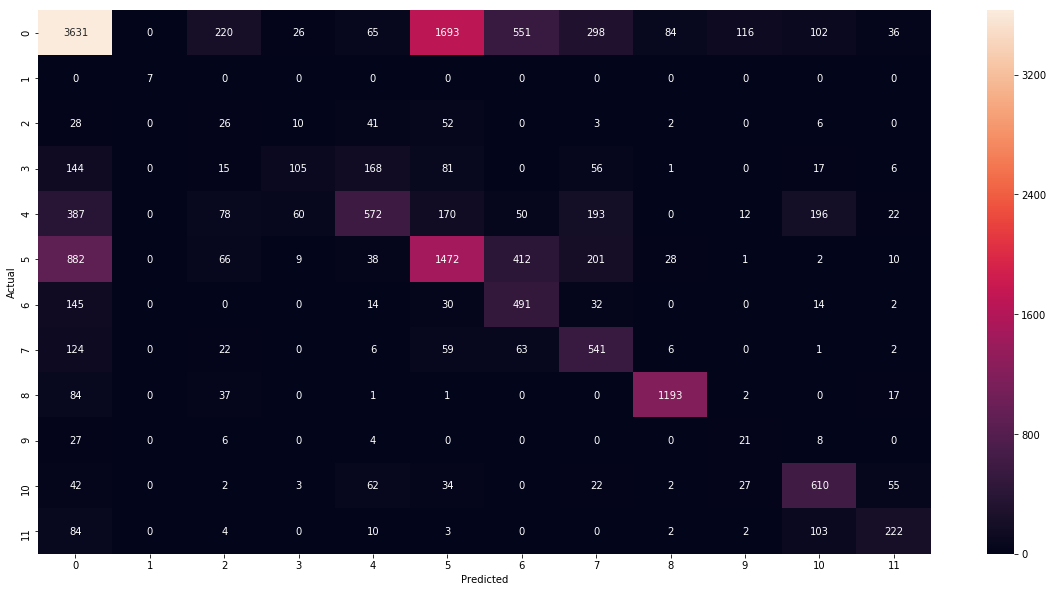

In [ ]:
cm.print_stats()
cm.plot(backend='seaborn', annot=True, fmt='g')
plt.show()

## <center>Normalized Confusion Matrix (as we have imbalanced target values)

Source:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py


I copied and modified the code from the above website

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with
class_names = np.sort(np.unique(y))


# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    
    
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)



[[3631    0  220   26   65 1693  551  298   84  116  102   36]
 [   0    7    0    0    0    0    0    0    0    0    0    0]
 [  28    0   26   10   41   52    0    3    2    0    6    0]
 [ 144    0   15  105  168   81    0   56    1    0   17    6]
 [ 387    0   78   60  572  170   50  193    0   12  196   22]
 [ 882    0   66    9   38 1472  412  201   28    1    2   10]
 [ 145    0    0    0   14   30  491   32    0    0   14    2]
 [ 124    0   22    0    6   59   63  541    6    0    1    2]
 [  84    0   37    0    1    1    0    0 1193    2    0   17]
 [  27    0    6    0    4    0    0    0    0   21    8    0]
 [  42    0    2    3   62   34    0   22    2   27  610   55]
 [  84    0    4    0   10    3    0    0    2    2  103  222]]
Normalized confusion matrix
[[5.32e-01 0.00e+00 3.22e-02 3.81e-03 9.53e-03 2.48e-01 8.08e-02 4.37e-02
  1.23e-02 1.70e-02 1.50e-02 5.28e-03]
 [0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00

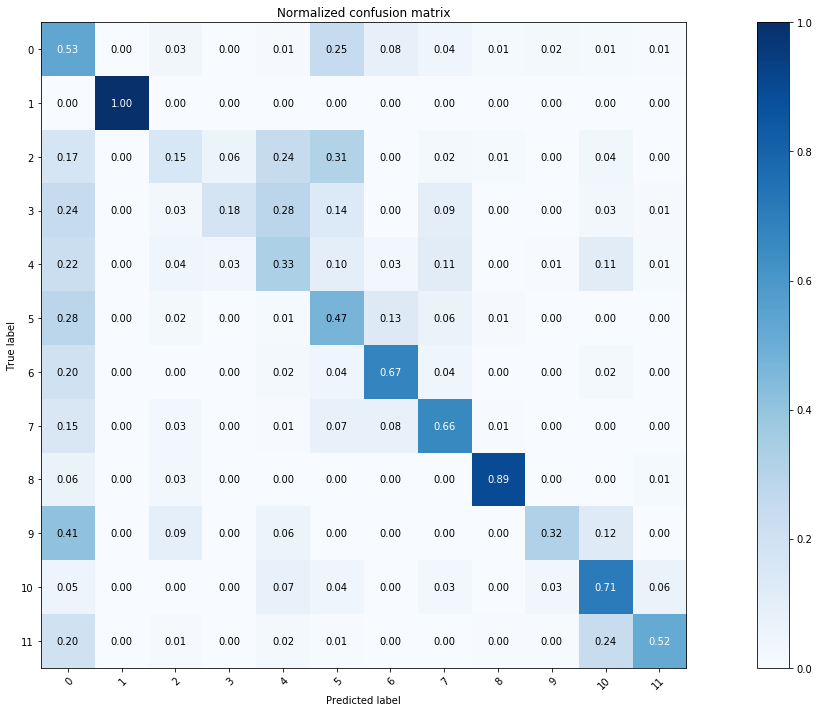

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_train, yhat_train, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## <center>Cross-validation</center>




In [ ]:
seed = 2357
np.random.seed(seed)
actuals = []
probs = []
hats = []

In [ ]:
# For summary stat of cross validation
from IPython.display import display
from scipy import stats
SCALE = False

kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
# Cross-validation
ind = 1
for train, test in kfold.split(X, y):
    # print('train: %s, test: %s' % (train, test))
    # Train classifier on training data, predict test data
    if SCALE:
        scaler.fit(X[train]) # Learn scaling parameters on training data
        Xtrain = scaler.transform(X[train])
        Xtest = scaler.transform(X[test]) # Apply transform to test data
    else:
        Xtrain = X[train]
        Xtest = X[test]
    
    temp = pd.DataFrame(Xtest.tolist(), columns = data.columns[0:-1])
    print('Cross validation set' + str(ind))
    ind += 1
    display(temp.describe())
          
    model.fit(Xtrain, y[train])
    foldhats = model.predict(Xtest)
    foldprobs = model.predict_proba(Xtest)[:,1] # Class probability estimates for ROC curve
    actuals = np.append(actuals, y[test]) # Combine targets, then probs, and then predictions from each fold
    probs = np.append(probs, foldprobs)
    hats = np.append(hats, foldhats)

Cross validation set1


,Intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000
mean,65.824389,93.942980,107.256109,383.113321,35.437470,124.170580,179.701965,9837.695736,172.073551,9665.558457
std,26.570725,42.130309,55.148592,213.383926,8.785365,32.127347,28.155661,5607.837078,41.173624,5529.352772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000
25%,52.000000,64.000000,69.000000,201.000000,37.000000,103.000000,176.000000,5024.750000,155.250000,4937.750000
50%,67.000000,90.000000,111.000000,383.500000,38.000000,121.000000,186.000000,9908.500000,175.000000,9658.000000
75%,79.000000,123.000000,149.000000,565.000000,38.000000,145.000000,195.000000,14667.750000,195.000000,14471.750000
max,143.000000,207.000000,231.000000,750.000000,47.000000,261.000000,280.000000,19610.000000,287.000000,19289.000000


Cross validation set2


,Intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000
mean,66.560374,94.209631,106.673455,384.721610,35.722808,123.902012,178.935314,9858.926210,171.573790,9593.723766
std,25.947246,41.382210,55.759914,211.528574,8.278815,32.783333,28.812800,5628.644316,40.612713,5571.227499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
25%,52.000000,63.000000,67.000000,205.000000,37.000000,102.000000,176.000000,5076.500000,154.000000,4715.250000
50%,68.000000,90.000000,111.000000,386.500000,38.000000,123.000000,184.000000,9938.500000,175.000000,9534.000000
75%,79.000000,123.000000,149.000000,564.750000,38.000000,143.000000,195.000000,14700.500000,195.000000,14351.000000
max,143.000000,205.000000,229.000000,750.000000,47.000000,259.000000,269.000000,19598.000000,282.000000,19292.000000


Cross validation set3


,Intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000
mean,66.705967,93.876348,107.046250,384.917565,35.671220,123.403067,179.348670,9867.391325,172.648694,9558.457704
std,26.362590,41.489883,54.997834,213.826481,8.334695,32.091432,29.148542,5578.612367,40.115195,5459.278539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000
25%,52.000000,64.000000,67.000000,197.000000,37.000000,103.000000,176.000000,5138.000000,155.000000,4906.000000
50%,68.000000,89.000000,110.000000,393.000000,38.000000,121.000000,186.000000,9901.000000,175.000000,9535.000000
75%,81.000000,123.000000,149.000000,570.000000,38.000000,142.000000,194.000000,14708.000000,195.000000,14220.000000
max,143.000000,205.000000,230.000000,750.000000,47.000000,256.000000,279.000000,19606.000000,284.000000,19290.000000


Cross validation set4


,Intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000
mean,66.955428,94.328780,107.437815,382.555715,35.639348,124.126288,179.693985,9815.678648,173.302181,9574.057992
std,25.903565,41.408602,54.767212,210.818607,8.348679,31.857667,28.522258,5539.939026,39.347634,5497.377606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,52.000000,64.000000,68.000000,201.000000,37.000000,103.000000,176.000000,5074.000000,156.000000,4893.000000
50%,68.000000,90.000000,112.000000,384.000000,38.000000,121.000000,186.000000,9784.000000,175.000000,9503.000000
75%,81.000000,123.000000,149.000000,566.000000,38.000000,143.000000,195.000000,14543.000000,195.000000,14242.000000
max,143.000000,204.000000,230.000000,750.000000,47.000000,248.000000,276.000000,19600.000000,285.000000,19284.000000


Cross validation set5


,Intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000
mean,65.943925,93.511383,107.655404,383.306734,35.488138,123.726096,179.207764,9826.101606,171.550204,9490.688474
std,27.081988,41.745292,55.566318,212.874412,8.819331,32.248852,28.775284,5605.155177,41.959412,5548.331326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
25%,52.000000,63.000000,68.000000,201.000000,37.000000,102.000000,176.000000,4993.000000,155.000000,4654.000000
50%,67.000000,89.000000,111.000000,385.000000,38.000000,121.000000,186.000000,9841.000000,175.000000,9371.000000
75%,80.000000,123.000000,150.000000,568.000000,38.000000,142.000000,195.000000,14639.000000,195.000000,14251.000000
max,143.000000,206.000000,230.000000,750.000000,47.000000,260.000000,268.000000,19611.000000,286.000000,19293.000000


## <center>Model evaluation on Cross Validation Set</center>

Accuracy:

In [ ]:
print(metrics.accuracy_score(actuals, hats))

0.5322758422389419


Classification report:

In [ ]:
print(metrics.classification_report(actuals, hats))

              precision    recall  f1-score   support

         0.0       0.65      0.54      0.59      8572
         1.0       1.00      0.90      0.95        10
         2.0       0.06      0.17      0.08       206
         3.0       0.45      0.16      0.24       705
         4.0       0.59      0.33      0.42      2190
         5.0       0.41      0.47      0.44      3923
         6.0       0.31      0.66      0.42       893
         7.0       0.39      0.65      0.49      1039
         8.0       0.92      0.89      0.90      1663
         9.0       0.14      0.36      0.20        89
        10.0       0.57      0.71      0.63      1044
        11.0       0.63      0.54      0.58       533

   micro avg       0.53      0.53      0.53     20867
   macro avg       0.51      0.53      0.50     20867
weighted avg       0.57      0.53      0.54     20867



## <center>Test (cross-validation) confusion matrix</center>

In [ ]:
cm = ConfusionMatrix(actuals, hats)
print(cm)

Predicted   0.0  1.0  2.0  3.0   4.0  ...   8.0  9.0  10.0  11.0  __all__
Actual                                ...                                
0.0        4607    0  287   41    76  ...    94  145   133    38     8572
1.0           1    9    0    0     0  ...     0    0     0     0       10
2.0          32    0   35   11    53  ...     1    0     9     0      206
3.0         186    0   18  114   190  ...     0    1    22    10      705
4.0         497    0   94   77   713  ...     2   20   240    25     2190
5.0        1134    0   94    8    59  ...    24    1     5    10     3923
6.0         185    0    1    0    14  ...     0    0    17     1      893
7.0         147    0   31    0     8  ...     6    0     1     1     1039
8.0         118    0   57    0     1  ...  1473    1     1    10     1663
9.0          32    0    7    0     6  ...     0   32    12     0       89
10.0         52    0    6    3    76  ...     1   29   738    71     1044
11.0        103    0    5    0    14  

Confusion Matrix:

Predicted   0.0  1.0  2.0  3.0   4.0  ...   8.0  9.0  10.0  11.0  __all__
Actual                                ...                                
0.0        4607    0  287   41    76  ...    94  145   133    38     8572
1.0           1    9    0    0     0  ...     0    0     0     0       10
2.0          32    0   35   11    53  ...     1    0     9     0      206
3.0         186    0   18  114   190  ...     0    1    22    10      705
4.0         497    0   94   77   713  ...     2   20   240    25     2190
5.0        1134    0   94    8    59  ...    24    1     5    10     3923
6.0         185    0    1    0    14  ...     0    0    17     1      893
7.0         147    0   31    0     8  ...     6    0     1     1     1039
8.0         118    0   57    0     1  ...  1473    1     1    10     1663
9.0          32    0    7    0     6  ...     0   32    12     0       89
10.0         52    0    6    3    76  ...     1   29   738    71     1044
11.0        103    

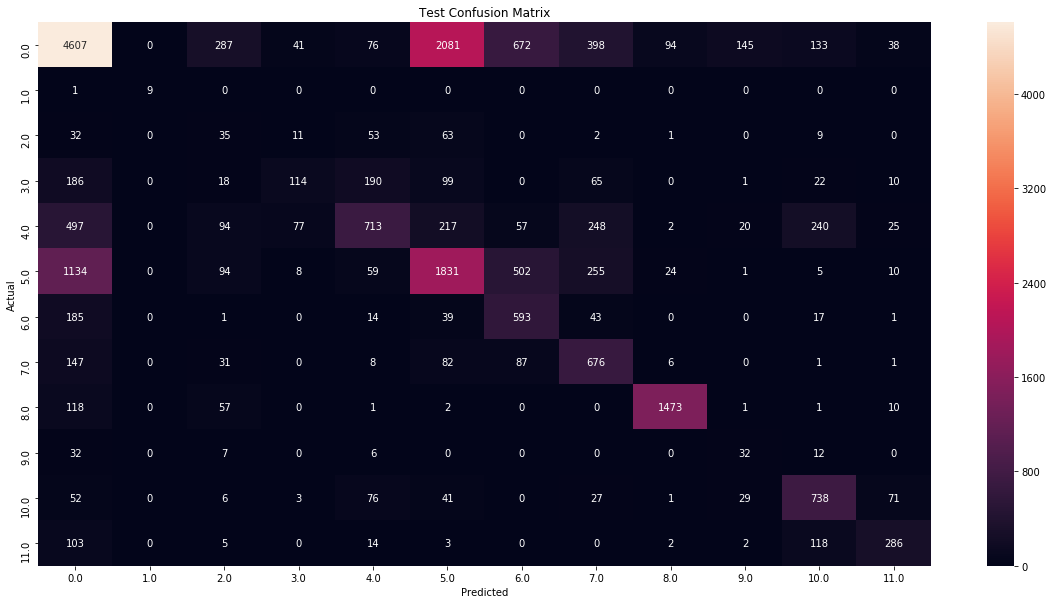

In [ ]:
cm.print_stats()
ax = cm.plot(backend='seaborn', annot=True, fmt='g')
ax.set_title('Test Confusion Matrix')
plt.show()

## <center> Normalized Confusion Matrix for Cross Validation

[[4607    0  287   41   76 2081  672  398   94  145  133   38]
 [   1    9    0    0    0    0    0    0    0    0    0    0]
 [  32    0   35   11   53   63    0    2    1    0    9    0]
 [ 186    0   18  114  190   99    0   65    0    1   22   10]
 [ 497    0   94   77  713  217   57  248    2   20  240   25]
 [1134    0   94    8   59 1831  502  255   24    1    5   10]
 [ 185    0    1    0   14   39  593   43    0    0   17    1]
 [ 147    0   31    0    8   82   87  676    6    0    1    1]
 [ 118    0   57    0    1    2    0    0 1473    1    1   10]
 [  32    0    7    0    6    0    0    0    0   32   12    0]
 [  52    0    6    3   76   41    0   27    1   29  738   71]
 [ 103    0    5    0   14    3    0    0    2    2  118  286]]
Normalized confusion matrix
[[5.37e-01 0.00e+00 3.35e-02 4.78e-03 8.87e-03 2.43e-01 7.84e-02 4.64e-02
  1.10e-02 1.69e-02 1.55e-02 4.43e-03]
 [1.00e-01 9.00e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00

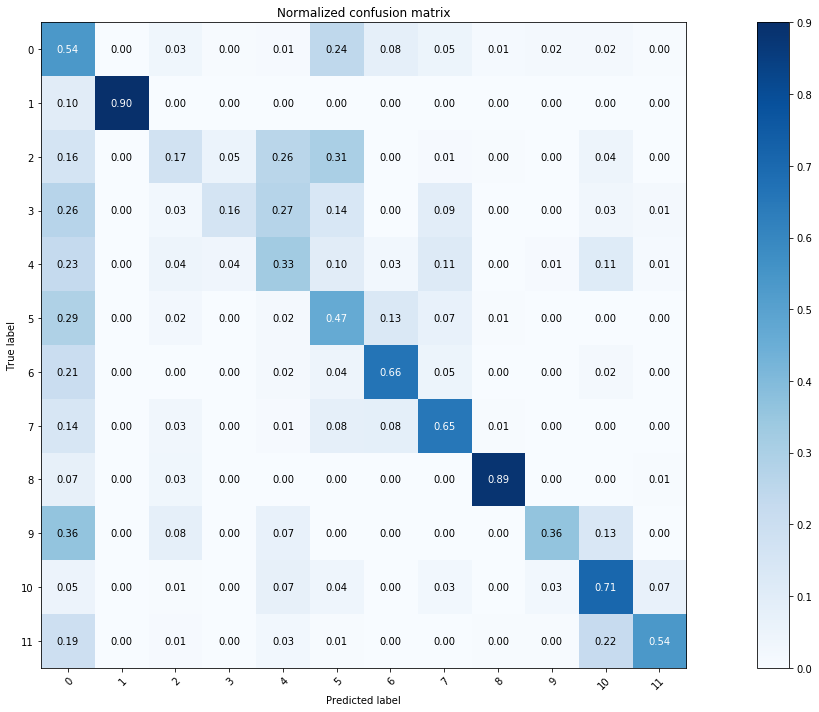

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(actuals.astype(int), hats.astype(int), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.plot(backend='seaborn', annot=False, fmt='g')
plt.show()

## <center>ROC curve</center>

Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

I copied and modified the code from the above website

In [ ]:
from itertools import cycle # for plotting


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Binarize the output
y = label_binarize(y, classes=class_names)
n_classes = y.shape[1]

# Learn to predict each class against the other
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)
classifier = OneVsRestClassifier(GaussianNB())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

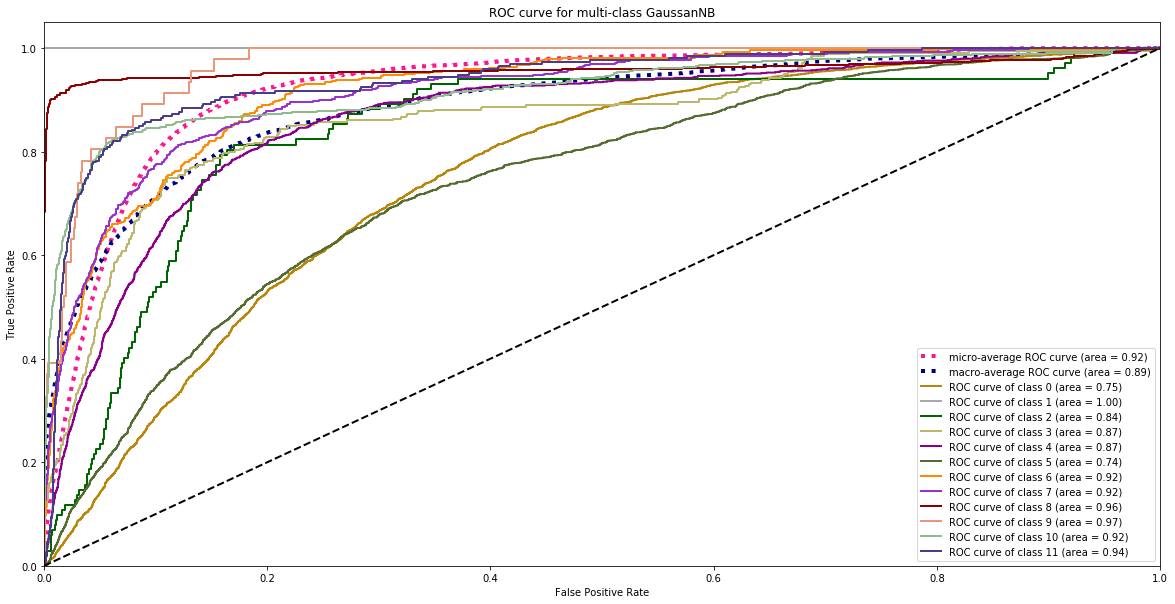

In [ ]:
# Compute macro-average ROC curve and ROC area
lw = 2 #line width for plotting

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['darkgoldenrod','darkgray','darkgreen','darkkhaki','darkmagenta','darkolivegreen','darkorange','darkorchid','darkred',
'darksalmon','darkseagreen','darkslateblue','darkslategray','darkturquoise','darkviolet'])


for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class GaussanNB')
plt.legend(loc="lower right")
plt.show()